<a href="https://colab.research.google.com/github/chrisporras/xgdiss/blob/main/XGDFinal2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project 2023
Machine Learning for Biomedical Data Science

Team Xtreme Gradient Dissenters

Members: Audrey Lee, Christian Porras, Joy Jiang

April 24, 2023

In [ ]:
!git clone https://github.com/chrisporras/xgdiss.git

Cloning into 'xgdiss'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 28 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), 198.41 KiB | 2.31 MiB/s, done.


In [ ]:
# install Kaggle public api
! pip install -q kaggle
# Choose the kaggle.json file that you downloaded
! mkdir ~/.kaggle
! cp ./xgdiss/kaggle.json ~/.kaggle/
# Make directory named kaggle and copy kaggle.json file there.
!chmod 600 ~/.kaggle/kaggle.json
#Change the permissions of the file.
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6848        257  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           2542         67  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2576         56  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [ ]:
!kaggle datasets download -d arianghasemi/mayo-clinic-resized-5gb

100% 848M/849M [00:32<00:00, 31.4MB/s]
100% 849M/849M [00:32<00:00, 27.3MB/s]


In [ ]:
!unzip mayo-clinic-resized-5gb.zip

Archive:  mayo-clinic-resized-5gb.zip
  inflating: data/train.csv          
  inflating: data/train_imgs/006388_0  
  inflating: data/train_imgs/008e5c_0  
  inflating: data/train_imgs/00c058_0  
  inflating: data/train_imgs/01adc5_0  
  inflating: data/train_imgs/026c97_0  
  inflating: data/train_imgs/028989_0  
  inflating: data/train_imgs/029c68_0  
  inflating: data/train_imgs/032f10_0  
  inflating: data/train_imgs/0372b0_0  
  inflating: data/train_imgs/037300_0  
  inflating: data/train_imgs/03d1ec_0  
  inflating: data/train_imgs/03e6b7_0  
  inflating: data/train_imgs/0415c3_0  
  inflating: data/train_imgs/04439c_0  
  inflating: data/train_imgs/045eb0_0  
  inflating: data/train_imgs/0468a8_0  
  inflating: data/train_imgs/0468a8_1  
  inflating: data/train_imgs/049194_0  
  inflating: data/train_imgs/049194_1  
  inflating: data/train_imgs/04f7a4_0  
  inflating: data/train_imgs/055f6a_0  
  inflating: data/train_imgs/05a1ec_0  
  inflating: data/train_imgs/062387_0  
  in

## Data Exploration

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('./data/train.csv')
train_df

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE
...,...,...,...,...,...
749,fe9645_0,3,fe9645,0,CE
750,fe9bec_0,4,fe9bec,0,LAA
751,ff14e0_0,6,ff14e0,0,CE
752,ffec5c_0,7,ffec5c,0,LAA


In [ ]:
labels_num = {"CE":0, "LAA":1}
train_df['label_num'] = train_df['label'].map(labels_num)

In [ ]:
train_df

,image_id,center_id,patient_id,image_num,label,label_num
0,006388_0,11,006388,0,CE,0
1,008e5c_0,11,008e5c,0,CE,0
2,00c058_0,11,00c058,0,LAA,1
3,01adc5_0,11,01adc5,0,LAA,1
4,026c97_0,4,026c97,0,CE,0
...,...,...,...,...,...,...
749,fe9645_0,3,fe9645,0,CE,0
750,fe9bec_0,4,fe9bec,0,LAA,1
751,ff14e0_0,6,ff14e0,0,CE,0
752,ffec5c_0,7,ffec5c,0,LAA,1


In [ ]:
train_df["file_path"] = train_df["image_id"].apply(lambda x: "./data/train_imgs/" + x)
train_df

,image_id,center_id,patient_id,image_num,label,label_num,file_path
0,006388_0,11,006388,0,CE,0,./data/train_imgs/006388_0
1,008e5c_0,11,008e5c,0,CE,0,./data/train_imgs/008e5c_0
2,00c058_0,11,00c058,0,LAA,1,./data/train_imgs/00c058_0
3,01adc5_0,11,01adc5,0,LAA,1,./data/train_imgs/01adc5_0
4,026c97_0,4,026c97,0,CE,0,./data/train_imgs/026c97_0
...,...,...,...,...,...,...,...
749,fe9645_0,3,fe9645,0,CE,0,./data/train_imgs/fe9645_0
750,fe9bec_0,4,fe9bec,0,LAA,1,./data/train_imgs/fe9bec_0
751,ff14e0_0,6,ff14e0,0,CE,0,./data/train_imgs/ff14e0_0
752,ffec5c_0,7,ffec5c,0,LAA,1,./data/train_imgs/ffec5c_0


In [ ]:
# Get how many in each label category
train_df.groupby(["label_num"]).count()

,image_id,center_id,patient_id,image_num,label,file_path
label_num,,,,,,
0,547,547,547,547,547,547
1,207,207,207,207,207,207


In [ ]:
train_df.groupby(["patient_id"]).count().sort_values(by=["image_id"])

,image_id,center_id,image_num,label,label_num,file_path
patient_id,,,,,,
006388,1,1,1,1,1,1
a1f13b,1,1,1,1,1,1
a22718,1,1,1,1,1,1
a24fac,1,1,1,1,1,1
a2b566,1,1,1,1,1,1
...,...,...,...,...,...,...
5987c0,4,4,4,4,4,4
56d177,5,5,5,5,5,5
91b9d3,5,5,5,5,5,5


Should be 754 images

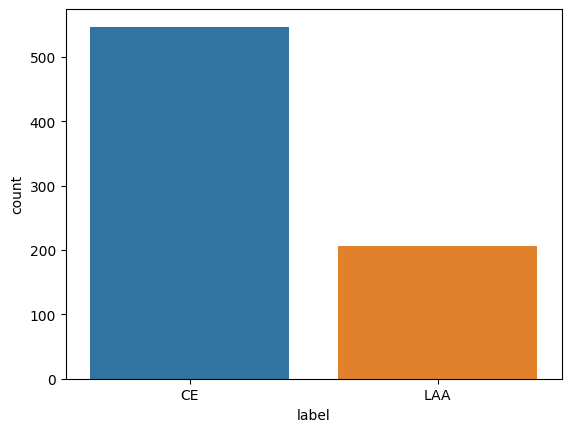

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the different classes
fig, ax = plt.subplots()
ax = sns.countplot(data=train_df,
                   x="label")


In [ ]:
# For more ease getting word labels from numerical predictions later
num_labels = {v:k for k,v in labels_num.items()}
num_labels

{0: 'CE', 1: 'LAA'}

In [ ]:
%%time
x_train = []
for path in tqdm(train_df["file_path"]):
    with open(path,"rb") as f:
        img = pickle.load(f)
    x_train.append(img)

100%|██████████| 754/754 [00:06<00:00, 122.79it/s]

CPU times: user 165 ms, sys: 4.58 s, total: 4.74 s
Wall time: 6.15 s


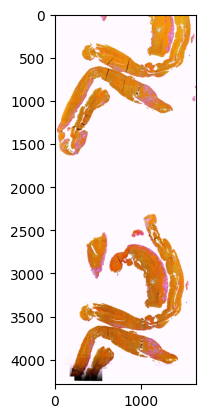

In [ ]:
plt.imshow(x_train[5])

## Stratified Group K Fold to split into train/val/test

We use group stratified k fold splitting to create 64%-16%-20% training-validation-testing splits to ensure relatively equal class distribution while safeguarding against data leakage.

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedGroupKFold

gskf = StratifiedGroupKFold(n_splits=5, shuffle = True, random_state = 42)
splitter = gskf.split(train_df['image_id'], train_df['label'], groups=train_df['patient_id'])

for fold,(trainval_idx, test_idx) in enumerate(splitter):
  trainval = train_df.loc[trainval_idx]
  test = train_df.loc[test_idx]
  train_label_count = trainval['label'].value_counts()
  testval_label_count = test['label'].value_counts()
  break

In [ ]:
trainval = trainval.reset_index()
test = test.reset_index()
test.to_csv('test_5g.csv')

In [ ]:
test

,index,image_id,center_id,patient_id,image_num,label,label_num,file_path
0,3,01adc5_0,11,01adc5,0,LAA,1,./data/train_imgs/01adc5_0
1,9,037300_0,11,037300,0,CE,0,./data/train_imgs/037300_0
2,19,04f7a4_0,11,04f7a4,0,CE,0,./data/train_imgs/04f7a4_0
3,24,08d3d8_0,4,08d3d8,0,LAA,1,./data/train_imgs/08d3d8_0
4,31,0a3ad1_0,7,0a3ad1,0,LAA,1,./data/train_imgs/0a3ad1_0
...,...,...,...,...,...,...,...,...
136,719,f8712b_0,11,f8712b,0,CE,0,./data/train_imgs/f8712b_0
137,728,fa9050_0,11,fa9050,0,CE,0,./data/train_imgs/fa9050_0
138,738,fd368e_0,10,fd368e,0,LAA,1,./data/train_imgs/fd368e_0
139,740,fd684f_0,11,fd684f,0,LAA,1,./data/train_imgs/fd684f_0


In [ ]:
test.groupby(["label_num"]).count()

,index,image_id,center_id,patient_id,image_num,label,file_path
label_num,,,,,,,
0,105,105,105,105,105,105,105
1,36,36,36,36,36,36,36


In [ ]:
test.groupby(["patient_id"]).count().sort_values(by=["index"])

,index,image_id,center_id,image_num,label,label_num,file_path
patient_id,,,,,,,
01adc5,1,1,1,1,1,1,1
c07ca9,1,1,1,1,1,1,1
bf1599,1,1,1,1,1,1,1
baa4c4,1,1,1,1,1,1,1
b894f4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
d44b91,2,2,2,2,2,2,2
a59c0d,2,2,2,2,2,2,2
abc4a3,3,3,3,3,3,3,3


In [ ]:
gskf = StratifiedGroupKFold(n_splits=5, shuffle = True, random_state = 42)
splitter = gskf.split(trainval['image_id'], trainval['label'], groups=trainval['patient_id'])
for fold,(train_idx, val_idx) in enumerate(splitter):
  train = trainval.loc[train_idx]
  val = trainval.loc[val_idx]
  train_label_count = train['label'].value_counts()
  val_label_count = val['label'].value_counts()
  break

# del train['level_0']
# del val['level_0']
train = train.reset_index()
val = val.reset_index()

train=train.drop(columns=["level_0"])
val=val.drop(columns=["level_0"])

print(train)
print(val)

train.to_csv('train_5g.csv')
val.to_csv('val_5g.csv')

     index  image_id  center_id patient_id  image_num label  label_num  \
0        1  008e5c_0         11     008e5c          0    CE          0   
1        2  00c058_0         11     00c058          0   LAA          1   
2        5  028989_0          5     028989          0   LAA          1   
3        6  029c68_0          5     029c68          0    CE          0   
4        7  032f10_0          7     032f10          0    CE          0   
..     ...       ...        ...        ...        ...   ...        ...   
494    747  fdf998_1          4     fdf998          1    CE          0   
495    748  fe0cca_0          1     fe0cca          0    CE          0   
496    751  ff14e0_0          6     ff14e0          0    CE          0   
497    752  ffec5c_0          7     ffec5c          0   LAA          1   
498    753  ffec5c_1          7     ffec5c          1   LAA          1   

                      file_path  
0    ./data/train_imgs/008e5c_0  
1    ./data/train_imgs/00c058_0  
2    ./da

In [ ]:
train

,index,image_id,center_id,patient_id,image_num,label,label_num,file_path
0,1,008e5c_0,11,008e5c,0,CE,0,./data/train_imgs/008e5c_0
1,2,00c058_0,11,00c058,0,LAA,1,./data/train_imgs/00c058_0
2,5,028989_0,5,028989,0,LAA,1,./data/train_imgs/028989_0
3,6,029c68_0,5,029c68,0,CE,0,./data/train_imgs/029c68_0
4,7,032f10_0,7,032f10,0,CE,0,./data/train_imgs/032f10_0
...,...,...,...,...,...,...,...,...
494,747,fdf998_1,4,fdf998,1,CE,0,./data/train_imgs/fdf998_1
495,748,fe0cca_0,1,fe0cca,0,CE,0,./data/train_imgs/fe0cca_0
496,751,ff14e0_0,6,ff14e0,0,CE,0,./data/train_imgs/ff14e0_0
497,752,ffec5c_0,7,ffec5c,0,LAA,1,./data/train_imgs/ffec5c_0


In [ ]:
val

,index,image_id,center_id,patient_id,image_num,label,label_num,file_path
0,0,006388_0,11,006388,0,CE,0,./data/train_imgs/006388_0
1,4,026c97_0,4,026c97,0,CE,0,./data/train_imgs/026c97_0
2,8,0372b0_0,7,0372b0,0,CE,0,./data/train_imgs/0372b0_0
3,15,0468a8_0,11,0468a8,0,CE,0,./data/train_imgs/0468a8_0
4,16,0468a8_1,11,0468a8,1,CE,0,./data/train_imgs/0468a8_1
...,...,...,...,...,...,...,...,...
109,724,f9c105_0,11,f9c105,0,CE,0,./data/train_imgs/f9c105_0
110,731,fb5f7e_0,4,fb5f7e,0,CE,0,./data/train_imgs/fb5f7e_0
111,732,fb5f7e_1,4,fb5f7e,1,CE,0,./data/train_imgs/fb5f7e_1
112,741,fd7c5b_0,2,fd7c5b,0,CE,0,./data/train_imgs/fd7c5b_0


In [ ]:
# Configuration class
class Config:
    resize = False
    batch_size = 32
    numworkers = 2

In [ ]:
import os
from PIL import Image
import torchvision
from skimage import io
import numpy as np
import torch
from skimage.io import imread
from skimage.util import img_as_ubyte
from skimage import exposure
import cv2

class CustomImageDataset(torch.utils.data.Dataset):
    """Make a custom dataset for the pathology patches"""  
    def __init__(self, image_dir, df, transform=None):
        # Create one iterable that can be __getitemed__
        self.image_dir = image_dir
        self.df = df
        self.transform = transform # added transform
        # self.testset = testset # indicates if dataset is the test set

    def __len__(self): # Denotes the total number of samples
        # return self.df.shape[0] # orig
        return len(self.df) # try this

    def normalize(self, image):
      return image


    def __getitem__(self, index): # Generates one sample of data
        
        # added this
        if torch.is_tensor(index):
          index = index.tolist()

        # Goes to image_tensor below
        # image_path = os.path.join(self.image_dir, self.df.iloc[index]['image_id'])
        image_path = self.df.iloc[index]["file_path"]
        # print(image_path)
        image_file = open(image_path, 'rb')
        image_og = pickle.load(image_file)
        # print(type(image_og))
        image_file.close()
        # image_og = imread(image_path)
        # image_og = imread(image_path, as_gray=True) # read in png or jpg

        # Apply image-level conversion and/or normalization for preprocessing
        image = self.normalize(image_og)

        # Convert to 3D tensor
        # t = ToTensor3D()
        # image = t(image)

        if self.transform:
          image = self.transform(image)

        # Since the test set has no label_num, we get the image id
        label = torch.tensor(self.df.iloc[index]['label_num'],dtype=torch.long)
        # if not(self.testset):
        #   label = torch.tensor(self.df.iloc[index]['label'],dtype=torch.long)
        # else:
        #   label = self.df.iloc[index]['id']
        
        return image, label

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, WeightedRandomSampler
from torchvision import datasets, transforms

# First, work with some minimal transforms
initial_transforms = transforms.Compose([
      transforms.ToTensor(),
      transforms.Resize((224,224)),
      transforms.Normalize([0, 0, 0], [1, 1, 1])
      ])

train_dataset = CustomImageDataset(image_dir="data/train_imgs", df=train, 
                                   transform=initial_transforms)

image_loader = DataLoader(train_dataset, batch_size=Config.batch_size,
                          shuffle=False, num_workers=Config.numworkers)

def batch_mean_and_sd(loader):
    """
    Helper function to get mean and std of dataset using the dataloader.
    See: https://www.google.com/url?q=https://www.binarystudy.com/2022/04/how-to-normalize-image-dataset-inpytorch.html&sa=D&source=editors&ust=1679883727112650&usg=AOvVaw0FvYMWXTnXnGFI5RooK_pJ
    """
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in loader:
        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2,
                                  dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (
                      cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (
                            cnt + nb_pixels)
        cnt += nb_pixels

    mean, std = fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)        
    return mean,std
  
train_ds_mean, train_ds_std = batch_mean_and_sd(image_loader)
print("mean and std: \n", train_ds_mean, train_ds_std)

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

mean and std: 
 tensor([0.9513, 0.9059, 0.9157]) tensor([0.0938, 0.1663, 0.2136])


In [ ]:
from torchvision import datasets, transforms

# Define transforms I want to use
data_transforms = {
  "train": transforms.Compose([
      transforms.ToTensor(),
      transforms.Resize((224,224)),
      # transforms.Resize(256),
      # transforms.CenterCrop(224),
      # transforms.RandomResizedCrop(224), # Some data augmentation --> get rid of? Seems to get padded areas
      # transforms.Normalize(train_ds_mean, [1., 1., 1.]),
      transforms.RandomHorizontalFlip(), # Some data augmentation
      transforms.RandomVerticalFlip(), # Data augmentation
      # transforms.RandomRotation(25), # Data augmentation
      # transforms.Normalize(train_ds_mean, [1., 1., 1.])
      transforms.RandomAffine(degrees=25, scale=(0.8, 1.2)), # NEW
      transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
      # transforms.RandomAutocontrast(),
      transforms.Normalize(train_ds_mean, train_ds_std)
      ]),

  "val": transforms.Compose([
      transforms.ToTensor(),
      transforms.Resize((224,224)),
      transforms.Normalize(train_ds_mean, train_ds_std)
  ]),
  "test": transforms.Compose([
      transforms.ToTensor(),
      transforms.Resize((224,224)),
      transforms.Normalize(train_ds_mean, train_ds_std)
  ])
}

In [ ]:
train_dataset = CustomImageDataset(image_dir="data/train_imgs", df=train, 
                                   transform=data_transforms["train"])
val_dataset = CustomImageDataset(image_dir="data/train_imgs", df=val, 
                                   transform=data_transforms["val"])
test_dataset = CustomImageDataset(image_dir="data/train_imgs", df=test, 
                                   transform=data_transforms["test"])

In [ ]:
# train_dataset.df["label_num"].values.tolist()

In [ ]:
from torch.utils.data import WeightedRandomSampler

# Addressing class imbalance by weighting samples 
# Adjust sample weights within each batch to balance the five classes.
y_train = train_dataset.df["label_num"].values.tolist()
class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in y_train])
samples_weight = torch.from_numpy(samples_weight)

# sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight))
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

# Remake the train dataloader
train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=Config.batch_size,
                          num_workers=Config.numworkers)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=Config.batch_size, 
                                         shuffle=True, num_workers=Config.numworkers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=Config.batch_size, 
                                         shuffle=False)
# Can uncomment to see the distribution of each batch
# # Build batches - check distribution of classes per batch
# for step, (img,label) in enumerate(train_loader):
#   print("batch index {}, 0/1/2/3/4: {}/{}/{}/{}/{}".format(step,
#                                                            len(np.where(label.numpy() == 0)[0]),
#                                                            len(np.where(label.numpy() == 1)[0]),
#                                                            len(np.where(label.numpy() == 2)[0]),
#                                                            len(np.where(label.numpy() == 3)[0]),
#                                                            len(np.where(label.numpy() == 4)[0]))
#   )


# Putting these into a dict format for easier use later
dataloaders = {"train": train_loader,
               "val": val_loader,
               "test": test_loader
               }

dataset_sizes = {"train": len(train_dataset),
                 "val": len(val_dataset),
                 "test": len(test_dataset)
                 }

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = train_ds_mean.numpy()
    std = train_ds_std.numpy()
    
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

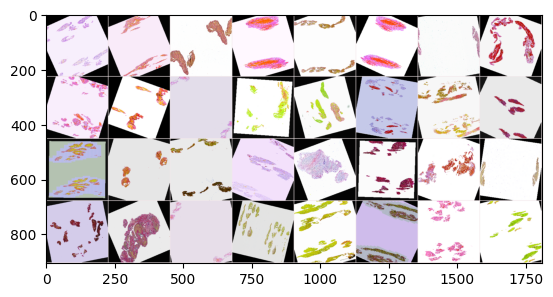

['CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'LAA', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'LAA', 'CE', 'CE', 'LAA', 'LAA', 'LAA', 'LAA']


In [ ]:
import matplotlib.pyplot as plt
from skimage import io, img_as_float32
import numpy as np
import torch

# To get one image:
# temp_img, temp_lab = train_dataset[0]
# print(temp_img.shape)
# imshow(temp_img, title=num_labels[temp_lab.item()])
# plt.title(num_labels[temp_lab.item()])

# To get a batch of images
temp_img, temp_lab = next(iter(dataloaders["train"]))
# Make a grid from batch
out = torchvision.utils.make_grid(temp_img)
imshow(out)
# imshow(out, title=[num_labels[x.item()] for x in temp_lab])
labels_list = [num_labels[x.item()] for x in temp_lab]
print(labels_list)
plt.show()

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

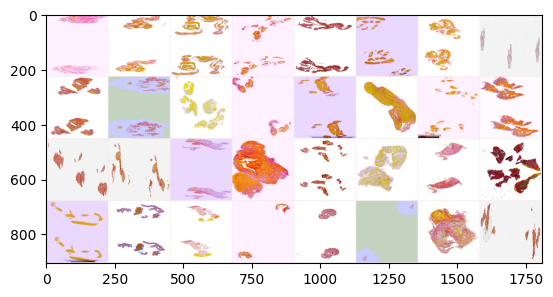

['CE', 'CE', 'CE', 'LAA', 'CE', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'LAA', 'CE', 'CE']


In [ ]:
# To get a batch of images
temp_img, temp_lab = next(iter(dataloaders["val"]))
# Make a grid from batch
out = torchvision.utils.make_grid(temp_img)
imshow(out)
# imshow(out, title=[num_labels[x.item()] for x in temp_lab])
labels_list = [num_labels[x.item()] for x in temp_lab]
print(labels_list)
plt.show()

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


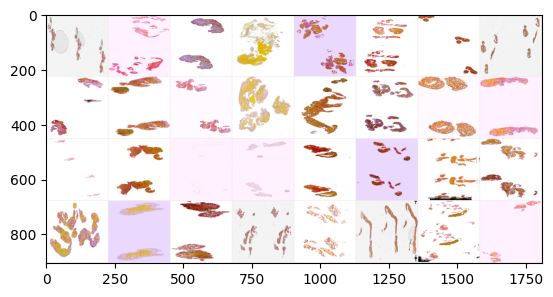

['LAA', 'CE', 'CE', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'CE']


In [ ]:
# To get a batch of images
temp_img, temp_lab = next(iter(dataloaders["test"]))
# Make a grid from batch
out = torchvision.utils.make_grid(temp_img)
imshow(out)
# imshow(out, title=[num_labels[x.item()] for x in temp_lab])
labels_list = [num_labels[x.item()] for x in temp_lab]
print(labels_list)
plt.show()

## Setting up training functions

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import random

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)

Using device:  cuda:0


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # # For book-keeping the losses and accuracies
    # epoch_ls = []
    # train_loss_ls = []
    # val_loss_ls = []
    # train_acc_ls = []
    # val_acc_ls = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def model_test(model):
  results = {}
  
  model.to(device)
  model.eval()

  correct=0
  total=0
  
  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['test']):
      inputs = inputs.to(device)
      labels = labels.to(device)
      # print(len(labels))

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      # statistics
      # running_loss += loss.item() * inputs.size(0)
      total += labels.size(0)
      correct += torch.sum(preds == labels.data)
      # print(preds)
      preds_list = [num_labels[x.item()] for x in preds]
      # print(len(preds_list))

      for i in range(len(labels)):
        results[labels[i]] = preds_list[i]

  print(f'Accuracy of the network: {100 * correct // total} %')
  return results

## Try ResNet18

In [ ]:
model_ft = models.resnet18(weights="DEFAULT")
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 217MB/s]


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.7093 Acc: 0.5731
val Loss: 0.7606 Acc: 0.5000

Epoch 1/9
----------
train Loss: 0.7215 Acc: 0.5691
val Loss: 0.7151 Acc: 0.5965

Epoch 2/9
----------
train Loss: 0.6339 Acc: 0.6453
val Loss: 0.7114 Acc: 0.6754

Epoch 3/9
----------
train Loss: 0.6141 Acc: 0.6653
val Loss: 1.0923 Acc: 0.4211

Epoch 4/9
----------
train Loss: 0.5800 Acc: 0.6814
val Loss: 0.7271 Acc: 0.6754

Epoch 5/9
----------
train Loss: 0.5559 Acc: 0.7054
val Loss: 0.7005 Acc: 0.6930

Epoch 6/9
----------
train Loss: 0.5629 Acc: 0.7114
val Loss: 1.2138 Acc: 0.4211

Epoch 7/9
----------
train Loss: 0.5023 Acc: 0.7575
val Loss: 1.0067 Acc: 0.6140

Epoch 8/9
----------
train Loss: 0.5135 Acc: 0.7495
val Loss: 0.8709 Acc: 0.6140

Epoch 9/9
----------
train Loss: 0.4587 Acc: 0.7735
val Loss: 1.0581 Acc: 0.5439

Training complete in 6m 11s
Best val Acc: 0.692982


In [ ]:
results = model_test(model)

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-multiple-gpus

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))